In [1]:
import pandas as pd 
from matplotlib import pyplot as plt

In [1]:
## EDA

In [2]:
df=pd.read_csv('garments_worker_productivity.csv')
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [4]:
df['department'].value_counts() # we see different types of department and the count for it 

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [5]:
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

In [6]:
#There is a weird thing that we have to 2 finnishing we need to fix it,one has more spaces !!

In [7]:
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

In [8]:
# Each quarter represent 1 week so why do we have 5?? 
# if a month has more than 28 days its allocating it to qurater 5 ex (Jan29) 
# we are going to move the quarter 5 to 4  

In [9]:
df['day'].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

In [10]:
# looked into the value counts of the object type , Now lets see the numeric type using describe

In [11]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [12]:
# there are some values exceding the productivity by 1 but in this it wont be a problem as i am making a classifying decision Tree 

In [13]:
productive=df[df['actual_productivity']>1]
productive

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


In [14]:
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [15]:
# wip has missing values


In [16]:
df[df['wip'].isnull()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
6,1/1/2015,Quarter1,finishing,Thursday,2,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.755167
13,1/1/2015,Quarter1,finishing,Thursday,10,0.65,3.94,NaN,960,0,0.0,0,0,8.0,0.705917
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


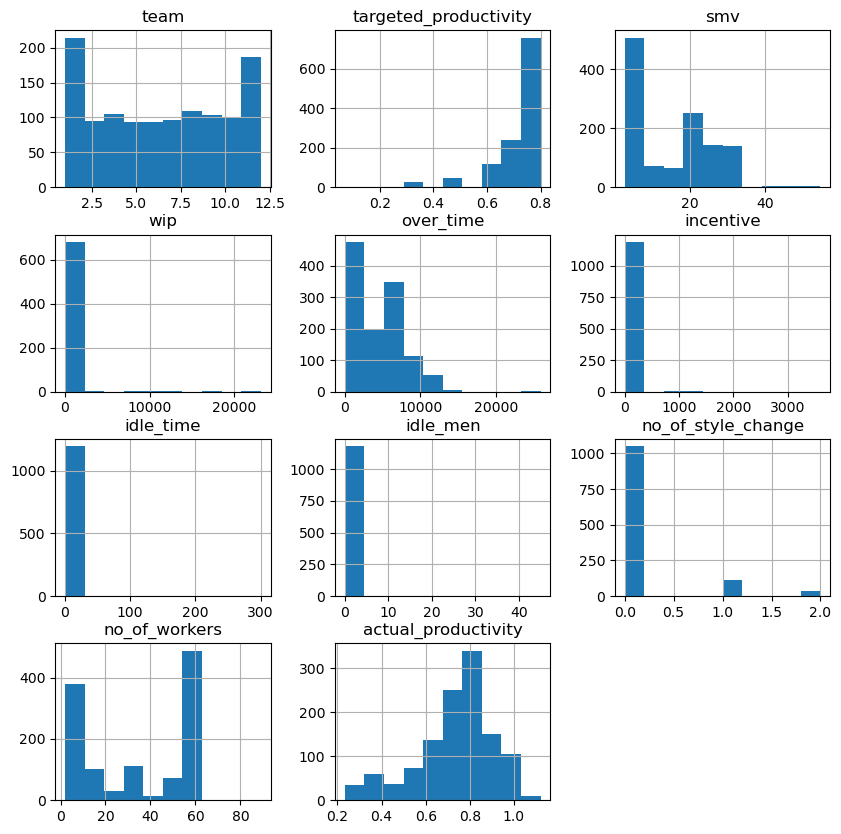

In [17]:
df.hist(figsize=(10,10)) #pandas is smart enough to make histogram on numeric columns even though we applied on the whold df
plt.show()

In [18]:
#wip doesnt seem to be very important

In [19]:
# we are seeing how many values does (idle_time, idle_men) have greater than 0 to see how important feature is it

In [20]:
print(len(df[df['idle_men']>0]))
print(len(df[df['idle_time']>0]))

18
18


In [21]:
#Since our data set has 1200 rows and only 18 of these are above 0 so this feature is pretty useless for us so we are going to remove these features

## Data Cleaning

In [22]:
# fixing the space 
df.loc[df['department']=='finishing ','department'] ='finishing'
#df.loc[condition(row),column]


In [23]:
df['department'].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

In [24]:
#df[df['no_of_style_change']>0]
df['no_of_style_change'].value_counts()
# Given that we have 1200 rows the nonzero values are still pretty low

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

removing date column (due to short time frame which is not useful for our model) 

removing idle_time , idle_men due to very few non-zero values 

removing wip because it has to many null-values

removing no_of_style_change due to few non-zero values


In [25]:
df=df.drop(['date','idle_time','idle_men','wip','no_of_style_change'],axis=1)
df.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,3660,50,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,3660,50,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1920,50,56.0,0.800382


In [26]:
#Merging Quarter 4 to Quarter 5 
df.loc[df['quarter']=='Quarter5','quarter']='Quarter4'
df['quarter'].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

In [27]:
# making quarter numeric

df.loc[df['quarter']=='Quarter1','quarter']=1
df.loc[df['quarter']=='Quarter2','quarter']=2
df.loc[df['quarter']=='Quarter3','quarter']=3
df.loc[df['quarter']=='Quarter4','quarter']=4

In [28]:
df['quarter'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1197 entries, 0 to 1196
Series name: quarter
Non-Null Count  Dtype 
--------------  ----- 
1197 non-null   object
dtypes: object(1)
memory usage: 9.5+ KB


In [29]:
# as it is still in object we will change it to integer 
df['quarter']=df['quarter'].astype('int64')
df['quarter'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1197 entries, 0 to 1196
Series name: quarter
Non-Null Count  Dtype
--------------  -----
1197 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB


In [30]:
# the # of workers are in float, but we can have fraction of workers so we need to convert it in integer 

df['no_of_workers']=df['no_of_workers'].astype('int')
df['no_of_workers'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1197 entries, 0 to 1196
Series name: no_of_workers
Non-Null Count  Dtype
--------------  -----
1197 non-null   int32
dtypes: int32(1)
memory usage: 4.8 KB


In [31]:
df.head(3)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.886500
2,1,sweing,Thursday,11,0.80,11.41,3660,50,30,0.800570


In [32]:
#coverting actual_productivity in 2 decimals like targeted_producitivity so we can easily compare

df['actual_productivity']=df['actual_productivity'].round(2)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89


In [33]:
# setting up new column for classifier based on whether it was productive or not 

df['productive']=df['actual_productivity']>= df['targeted_productivity']


# now we are going to be using df.sample instead of head because its going to give us random 10 dataframe rather than the first 10 which is good to prevent pattering which we dont want to get fooled by

In [34]:
df.sample(10,random_state=14)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
959,4,finishing,Thursday,10,0.70,2.90,3360,0,8,0.41,False
464,4,finishing,Tuesday,8,0.65,3.94,960,0,8,0.85,True
672,2,sweing,Sunday,7,0.70,24.26,6960,0,58,0.36,False
321,3,sweing,Monday,6,0.80,11.41,4380,50,31,0.80,True
282,3,finishing,Saturday,9,0.80,3.94,1800,0,10,0.83,True
307,3,sweing,Sunday,10,0.70,22.52,10080,40,56,0.70,True
609,1,finishing,Wednesday,9,0.75,3.94,960,0,8,0.76,True
1123,2,sweing,Sunday,8,0.60,30.48,6720,0,56,0.60,True
877,4,sweing,Sunday,9,0.70,18.79,3240,30,57,0.63,False
950,4,sweing,Thursday,3,0.75,29.40,6840,45,57,0.75,True


## ML PREP

In [35]:
# Machine learning models are mathematicaly based but since we have some objects in our data frame we need to change that to numeric 

In [36]:
#Luckily we have only 2 type of department so we can make the deparment column to boolean 

df=df.rename(columns={'department':'dept_sewing'})
df['dept_sewing']=df['dept_sewing'].map({'finishing':0,'sweing':1}).astype('int64')
df['dept_sewing'].unique()

array([1, 0], dtype=int64)

 We have to Change the qurater column into dummies ( bcz the model will assume Quarter 4 is greater than Quarter 1 but in reality quarter is just categories 

In [37]:
df=pd.concat([df,pd.get_dummies(df['quarter'],prefix='q')],axis=1).drop(['quarter'],axis=1)

df.sample(10,random_state=14)

,dept_sewing,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4
959,0,Thursday,10,0.70,2.90,3360,0,8,0.41,False,0,0,0,1
464,0,Tuesday,8,0.65,3.94,960,0,8,0.85,True,0,0,0,1
672,1,Sunday,7,0.70,24.26,6960,0,58,0.36,False,0,1,0,0
321,1,Monday,6,0.80,11.41,4380,50,31,0.80,True,0,0,1,0
282,0,Saturday,9,0.80,3.94,1800,0,10,0.83,True,0,0,1,0
307,1,Sunday,10,0.70,22.52,10080,40,56,0.70,True,0,0,1,0
609,0,Wednesday,9,0.75,3.94,960,0,8,0.76,True,1,0,0,0
1123,1,Sunday,8,0.60,30.48,6720,0,56,0.60,True,0,1,0,0
877,1,Sunday,9,0.70,18.79,3240,30,57,0.63,False,0,0,0,1
950,1,Thursday,3,0.75,29.40,6840,45,57,0.75,True,0,0,0,1


In [38]:
#Applying for day
df=pd.concat([df,pd.get_dummies(df['day'],prefix=None)],axis=1).drop(['day'],axis=1)
df.sample(10,random_state=14)

,dept_sewing,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
959,0,10,0.70,2.90,3360,0,8,0.41,False,0,0,0,1,0,0,0,1,0,0
464,0,8,0.65,3.94,960,0,8,0.85,True,0,0,0,1,0,0,0,0,1,0
672,1,7,0.70,24.26,6960,0,58,0.36,False,0,1,0,0,0,0,1,0,0,0
321,1,6,0.80,11.41,4380,50,31,0.80,True,0,0,1,0,1,0,0,0,0,0
282,0,9,0.80,3.94,1800,0,10,0.83,True,0,0,1,0,0,1,0,0,0,0
307,1,10,0.70,22.52,10080,40,56,0.70,True,0,0,1,0,0,0,1,0,0,0
609,0,9,0.75,3.94,960,0,8,0.76,True,1,0,0,0,0,0,0,0,0,1
1123,1,8,0.60,30.48,6720,0,56,0.60,True,0,1,0,0,0,0,1,0,0,0
877,1,9,0.70,18.79,3240,30,57,0.63,False,0,0,0,1,0,0,1,0,0,0
950,1,3,0.75,29.40,6840,45,57,0.75,True,0,0,0,1,0,0,0,1,0,0


In [39]:
#we are going to do same for team as it has teh same problem as quarter

df=pd.concat([df,pd.get_dummies(df['team'],prefix='team')],axis=1).drop(['team'],axis=1) 
df.sample(10,random_state=14)

,dept_sewing,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
959,0,0.70,2.90,3360,0,8,0.41,False,0,0,...,0,0,0,0,0,0,0,1,0,0
464,0,0.65,3.94,960,0,8,0.85,True,0,0,...,0,0,0,0,0,1,0,0,0,0
672,1,0.70,24.26,6960,0,58,0.36,False,0,1,...,0,0,0,0,1,0,0,0,0,0
321,1,0.80,11.41,4380,50,31,0.80,True,0,0,...,0,0,0,1,0,0,0,0,0,0
282,0,0.80,3.94,1800,0,10,0.83,True,0,0,...,0,0,0,0,0,0,1,0,0,0
307,1,0.70,22.52,10080,40,56,0.70,True,0,0,...,0,0,0,0,0,0,0,1,0,0
609,0,0.75,3.94,960,0,8,0.76,True,1,0,...,0,0,0,0,0,0,1,0,0,0
1123,1,0.60,30.48,6720,0,56,0.60,True,0,1,...,0,0,0,0,0,1,0,0,0,0
877,1,0.70,18.79,3240,30,57,0.63,False,0,0,...,0,0,0,0,0,0,1,0,0,0
950,1,0.75,29.40,6840,45,57,0.75,True,0,0,...,1,0,0,0,0,0,0,0,0,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dept_sewing            1197 non-null   int64  
 1   targeted_productivity  1197 non-null   float64
 2   smv                    1197 non-null   float64
 3   over_time              1197 non-null   int64  
 4   incentive              1197 non-null   int64  
 5   no_of_workers          1197 non-null   int32  
 6   actual_productivity    1197 non-null   float64
 7   productive             1197 non-null   bool   
 8   q_1                    1197 non-null   uint8  
 9   q_2                    1197 non-null   uint8  
 10  q_3                    1197 non-null   uint8  
 11  q_4                    1197 non-null   uint8  
 12  Monday                 1197 non-null   uint8  
 13  Saturday               1197 non-null   uint8  
 14  Sunday                 1197 non-null   uint8  
 15  Thur

## Tree

In [41]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

Shuffling is important beacuse our data set is ordered interms of date and shuffling will help ensure that we are not introducing any chunking bias in our training/testing data 

if we dont shuffle
The training data will all come from the earlier months (Jan–Feb)
The testing data will all come from the later dates (Mar)

So the model will only learn from the old data which is not good 

In [50]:
#Feature Selection
X=df.drop(['actual_productivity','productive'],axis=1)
y=df['productive']

#Xtrain and ytrain are both actual values of data (80% of data in this case ) 
#Xtest and Ytest is used for testing (20%of data in this case)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=True,random_state=24) 


In [44]:
tree=DecisionTreeClassifier(max_depth=3,random_state=24)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

In [51]:
y_pred=tree.predict(X_test)
#we are putting X_test values to predict y values and then later we will compare this y pred with actual y values(y_test)

## Visulizing and Evalutaing the Tree

In [53]:
from sklearn.metrics import accuracy_score

print('Accuracy:',round(accuracy_score(y_test,y_pred),2))

Accuracy: 0.85


In [55]:
tree.classes_ #predictions

array([False,  True])

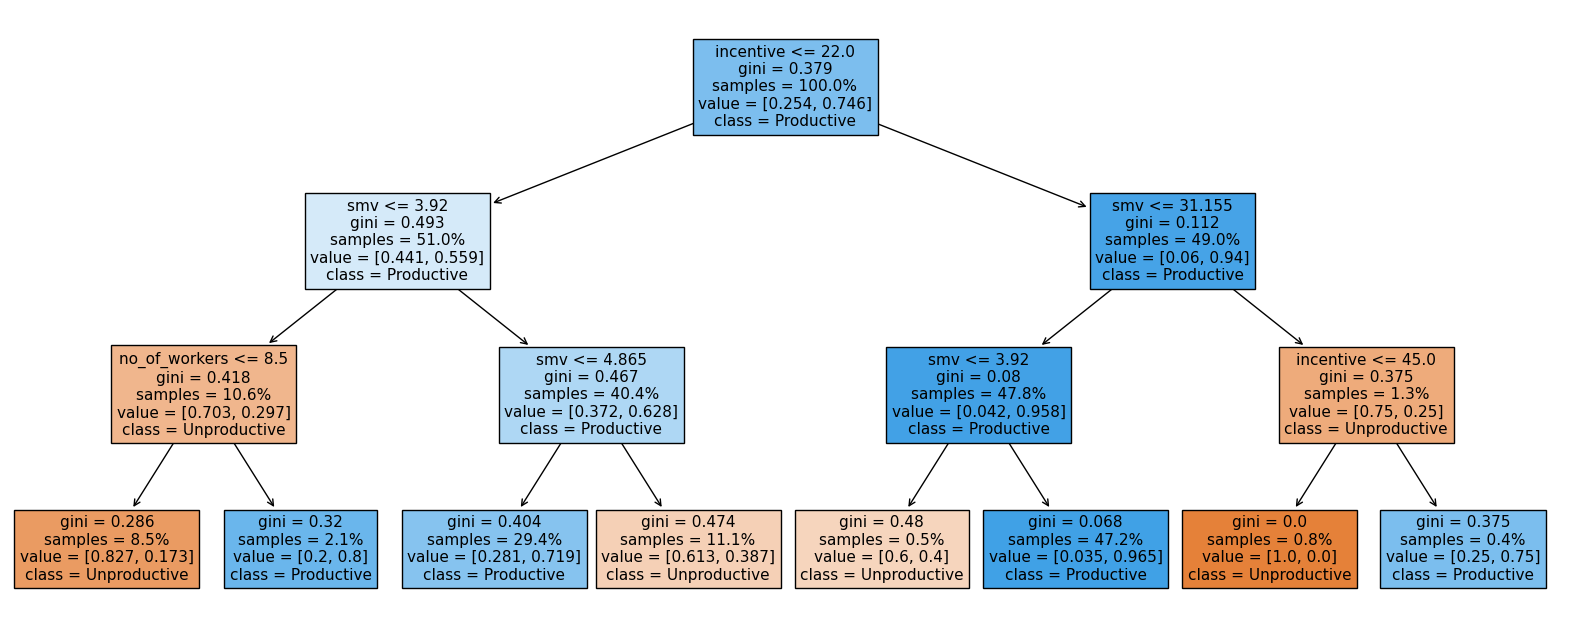

In [56]:
plt.figure(figsize = [20.0, 8.0])


_ = plot_tree(tree, 
              feature_names=X.columns, 
              class_names=["Unproductive", "Productive"],
              filled=True, 
              rounded=False, 
              proportion=True, 
              fontsize=11) 

In [58]:
#gini is how mixed the data set is, if its 0 there is only 1 category if its >0 mix of categories
# according to the tree it seems like smv, incentive are key features

In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)  #ytest acutal comes first and then y pred 

array([[ 35,  24],
       [ 13, 168]], dtype=int64)

 Confusion Matrix :
 
[[True Negatives, False Positives],

[False Negatives, True Positives]]

In [64]:
from sklearn.metrics import precision_score,recall_score,f1_score

print('precision:',round(precision_score(y_test,y_pred),2))
print('recall:',round(recall_score(y_test,y_pred),2))
print('f1:',round(f1_score(y_test,y_pred),2))

print("Accuracy:", round(tree.score(X_test, y_test), 2))

precision: 0.88
recall: 0.93
f1: 0.9
Accuracy: 0.85


In [65]:
from sklearn.model_selection import cross_val_score

scores=cross_val_score(tree,X,y,cv=10) 

print("Cross Validation Accuracy Scores:", scores.round(2)) 
print("Mean Cross Validation Score:", scores.mean().round(2))

Cross Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.72 0.76 0.84 0.79]
Mean Cross Validation Score: 0.82


precision, recall, and f1 are built-in scoring metrics in scikit-learn.
You don’t have to write the formulas yourself — cross_validate() knows how to calculate them automatically.

In [66]:
from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(
                             tree, 
                             X, y, cv=10, 
                             scoring= ("precision", "recall", "f1") )

print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))
print("Mean Cross Validated recall:", round(multiple_cross_scores["test_recall"].mean(), 2))
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated Precision: 0.85
Mean Cross Validated recall: 0.92
Mean Cross Validated F1: 0.88


In cross-validation:

The model is trained on 9 folds

Tested on the 1 remaining fold

So the results come from the test set (that’s why they’re called test_precision, test_recall, and test_f1)

So:

test_precision → precision scores from each fold’s test set

test_recall → recall scores from each fold’s test set

test_f1 → F1 scores from each fold’s test set

## Random Forest 

In [67]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
                                oob_score=True,                                  
                                random_state=24
                               )

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))

Accuracy: 0.85


In [68]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))


Out Of Bag Score: 0.83
